In [362]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

 
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [363]:
#Read in the csv file and convert to a Pandas dataframe
houses_train = pd.read_csv("data/train.csv")
houses_test = pd.read_csv("data/test.csv")
sale_price = pd.read_csv("data/sample_submission.csv")

In [364]:
# Merge the test dataset with the target 
houses_test = houses_test.merge(sale_price,on='Id')

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [365]:
sale_price.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [366]:
houses_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,169277.052498
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,187758.393989
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,183583.683570
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,179317.477511
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,150730.079977


In [367]:
houses_train.shape

(1460, 81)

In [368]:
houses_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [369]:
houses_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [370]:
houses_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


The process of profiling differs slightly for categorical and numerical variables due to their inherent differences.

**The two main types of data are:**
- Quantitative (numerical) data
- Qualitative (categorical) data

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [371]:
houses_train.duplicated().sum()

0

In [372]:
# go to delete duplicates columns

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [373]:
houses_train.isnull().sum().value_counts()

0       62
81       5
37       3
38       2
259      1
1369     1
872      1
8        1
1        1
690      1
1453     1
1179     1
1406     1
Name: count, dtype: int64

In [374]:
# go to clean them 

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [375]:
# check columns types 

## 2. Data Cleaning: 

Preliminary findings from data profiling can lead to cleaning the data by:
- Handling missing values
- Correcting errors.
- Dealing with outliers.

-------------------



### Handling missing values:

In [ ]:
houses_train['PoolQC'].isnull().sum()

1398

In [402]:
houses_train.drop('PoolQC',axis=1,inplace=True)

### Correcting errors

-------------------

In [376]:
# Compute Z-scores for the "SalePrice" column
houses_train["p_z_score"] = zscore(houses_train["SalePrice"])



# Identify outliers (|Z| > 3)
# I assume this is outliers so i will drop it from the dataset

indexs = houses_train[houses_train["p_z_score"].abs() > 3].sort_values('SalePrice').index

houses_train.drop(indexs,inplace=True)
del houses_train["p_z_score"]


In [377]:
# Compute Z-scores for the "GrLivArea" column
houses_train["p_z_score"] = zscore(houses_train["GrLivArea"])



# Identify outliers (|Z| > 3)
# I assume this is outliers so i will drop it from the dataset

indexs = houses_train[houses_train["p_z_score"].abs() > 3].sort_values('GrLivArea').index

houses_train.drop(indexs,inplace=True)
del houses_train["p_z_score"]


In [378]:
# Compute Z-scores for the "TotRmsAbvGrd" column
houses_train["p_z_score"] = zscore(houses_train["TotRmsAbvGrd"])



# Identify outliers (|Z| > 3)
# I assume this is outliers so i will drop it from the dataset

indexs = houses_train[houses_train["p_z_score"].abs() > 3].sort_values('TotRmsAbvGrd').index

houses_train.drop(indexs,inplace=True)
del houses_train["p_z_score"]


In [379]:
# Compute Z-scores for the "TotRmsAbvGrd" column
houses_train["p_z_score"] = zscore(houses_train["WoodDeckSF"])



# Identify outliers (|Z| > 3)
# I assume this is outliers so i will drop it from the dataset

indexs =houses_train[houses_train["p_z_score"].abs() > 4]['WoodDeckSF'].sort_values().index

houses_train.drop(indexs,inplace=True)
del houses_train["p_z_score"]


In [380]:
# Compute Z-scores for the "TotRmsAbvGrd" column
houses_train["p_z_score"] = zscore(houses_train["2ndFlrSF"])



# Identify outliers (|Z| > 3)
# I assume this is outliers so i will drop it from the dataset


indexs =houses_train[houses_train["p_z_score"].abs() > 4]['2ndFlrSF'].sort_values().index

houses_train.drop(indexs,inplace=True)
del houses_train["p_z_score"]



In [381]:
# Identify numerical columns
numerical_features = houses_train.select_dtypes(include=['number']).columns.tolist()

# Display the numerical columns
numerical_features

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [382]:
def remove_outliers_zscore(df, numerical_columns, threshold=3):
    filtered_df = df.copy()  # Create a copy to avoid modifying the original dataset
    
    for col in numerical_columns:
        mean = filtered_df[col].mean()
        std = filtered_df[col].std()
        
        # Compute Z-scores
        z_scores = (filtered_df[col] - mean) / std
        
        # Keep only rows where Z-score is within the threshold
        print(col,houses_train.shape[0]-filtered_df[np.abs(z_scores) <= threshold].shape[0])
    
    #return filtered_df

remove_outliers_zscore(houses_train, numerical_features)

Id 0
MSSubClass 27
LotFrontage 263
LotArea 10
OverallQual 11
OverallCond 24
YearBuilt 5
YearRemodAdd 0
MasVnrArea 35
BsmtFinSF1 2
BsmtFinSF2 47
BsmtUnfSF 9
TotalBsmtSF 4
1stFlrSF 8
2ndFlrSF 1
LowQualFinSF 15
GrLivArea 3
BsmtFullBath 13
BsmtHalfBath 78
FullBath 0
HalfBath 10
BedroomAbvGr 10
KitchenAbvGr 60
TotRmsAbvGrd 1
Fireplaces 4
GarageYrBlt 80
GarageCars 4
GarageArea 4
WoodDeckSF 18
OpenPorchSF 26
EnclosedPorch 53
3SsnPorch 23
ScreenPorch 57
PoolArea 3
MiscVal 7
MoSold 0
YrSold 0
SalePrice 20


In [383]:
houses_train.shape

(1406, 81)

### Dealing with outliers:

**How to remove Outliers?**
Most of the ways to deal with outliers are similar to the methods of missing values like deleting rows, transforming them, binning them, treat them as a separate group, imputing values and other statistical methods. Here, we will discuss the common techniques used to deal with outliers:

1. Deleting rows: We delete outlier values if it is due to data entry error, data processing error or outlier rows are very small in numbers. We can also use trimming at both ends to remove outliers.

2. Imputing: Like imputation of missing values, we can also impute outliers. We can use mean, median, mode imputation methods. Before imputing values, we should analyse if it is natural outlier or artificial. If it is artificial, we can go with imputing values. We can also use statistical model to predict values of outlier rows and after that we can impute it with predicted values.

3. Treat separately: If there are significant number of outliers, we should treat them separately in the statistical model. One of the approach is to treat both groups as two different groups and build individual model for both groups and then combine the output.


## 3. Univariate Analysis: 

This involves examining single variables to understand their characteristics (distribution, central tendency, dispersion, and shape).

We calculate **numerical values** about the data that tells us about the distribution of the data. We also **draw graphs** showing visually how the data is distributed. **To answer the following questions about Features/characteristics of Data:**
- Where is the center of the data? (location)
- How much does the data vary? (scale)
- What is the shape of the data? (shape)

**The benefits of this analysis:**
Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

**In this step, we will explore variables one by one using following approaches:**

### 1. Univariate Graphical Analysis:
Method to perform uni-variate analysis will depend on whether the variable type is categorical or numerical.

#### I. Categorical Variables:

we’ll use frequency table to understand distribution of each category
- Bar Chart (Ordinal) - Orderd
- Pie Chart (Nominal) - non Orderd

#### II. Numerical Variables:

we need to understand the central tendency and spread of the variable (Descriptive Analysis) using:
   - Box plot
   - Histogram

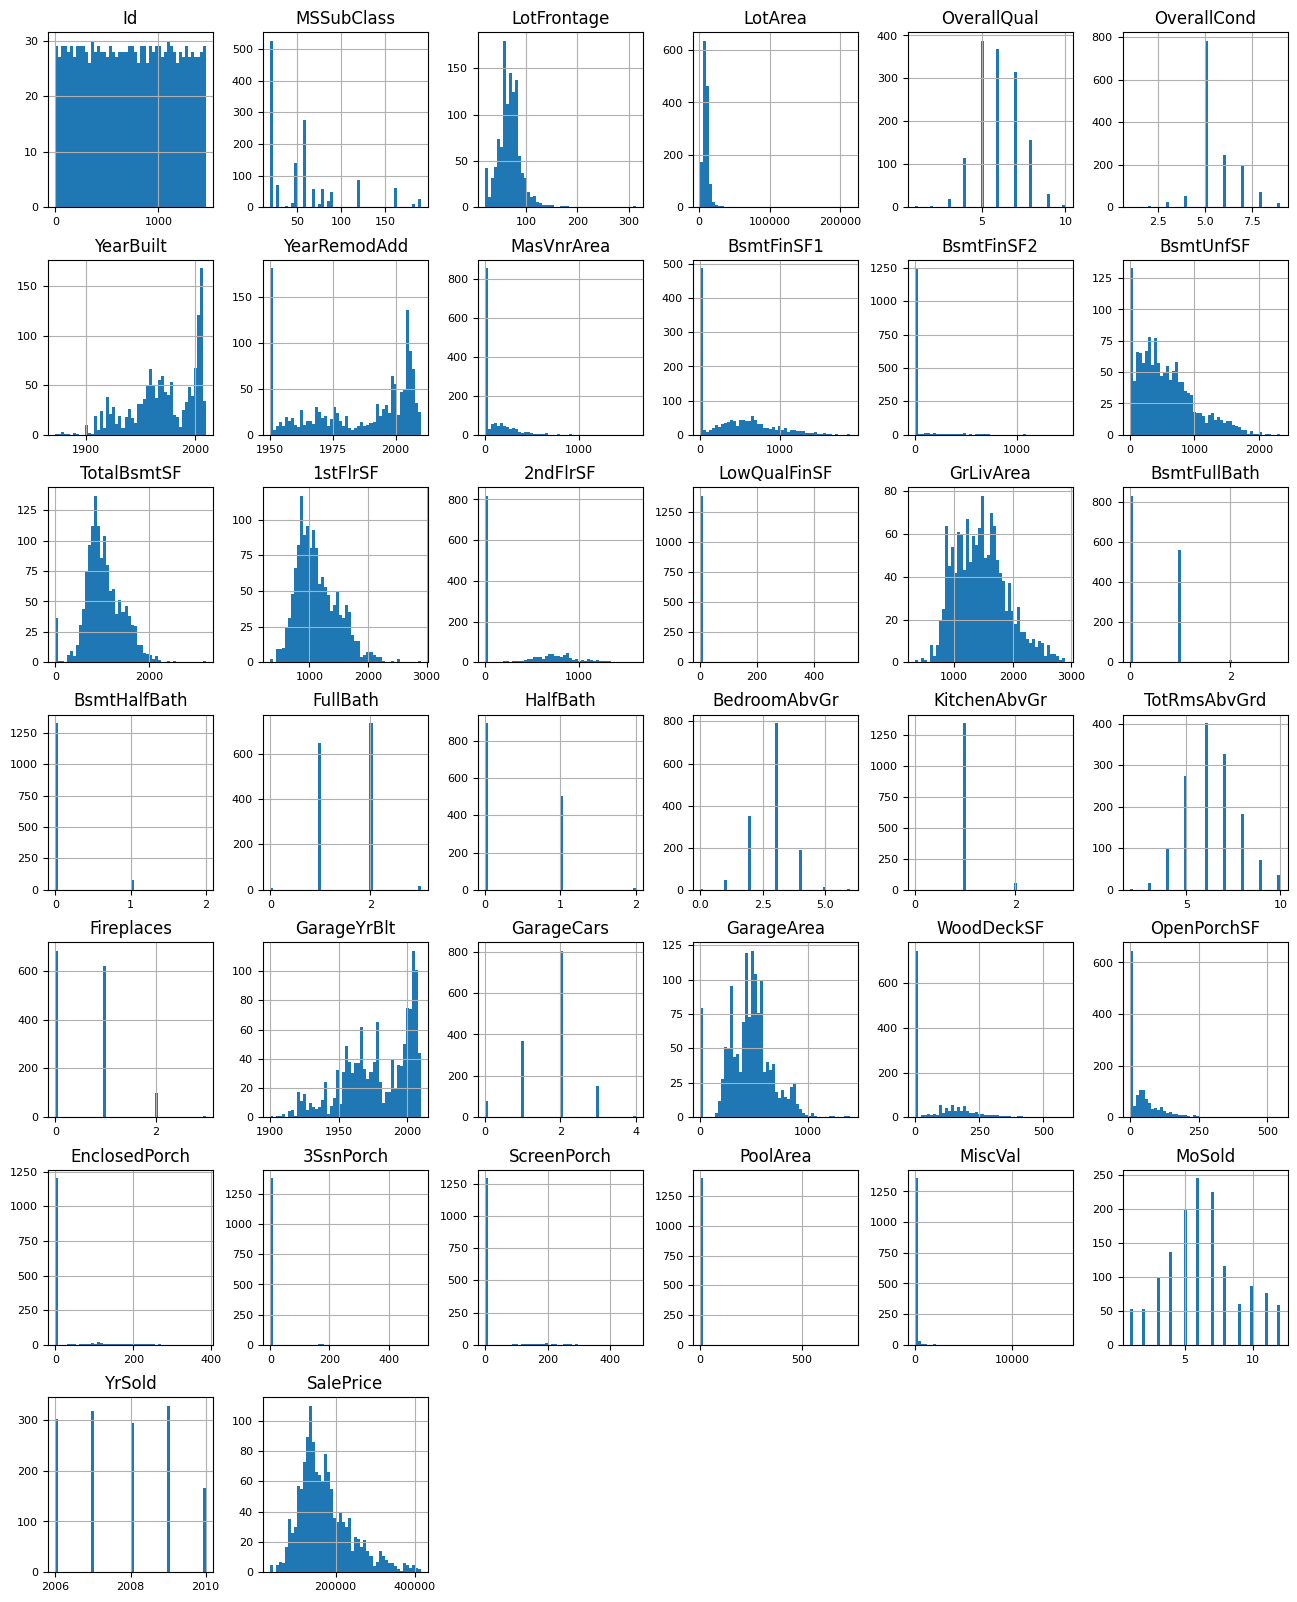

In [384]:
df_num = houses_train.select_dtypes(include = ['float64', 'int64'])
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

### 2. Univariate Non-Graphical analysis: 

- Where is the center of the data? (location) --> **Measures of central tendency**
- How much does the data vary? (scale) --> **Measure of variability**
- What is the shape of the data? (shape) --> **Measures of variation combined with an average (measure of center) gives a good picture of the distribution of the data.**

## 4. Bivariate/Multivariate Analysis:

Here, you look at the relationships between two or more variables. This can involve looking for correlations, patterns, and trends that suggest a relationship or an association.

We can perform bi-variate analysis for any combination of categorical and numerical variables. The combination can be:
| bi-variate variables   | Plot type |
| ------------- | ------------- |
| Categorical & Categorical| Stacked Bar Chart |
| Categorical & numerical  | scatter plot, histogram, box plot|
| numerical  & numerical  | Scatter plot, line chart| 


Multivariate Analysis:
- Heat map
- Bar Chart
- Scatter Chart
- Line Chart

**Categorical & Categorical --> (Stacked Column Chart)**

**Categorical & numerical --> (scatter plot, histogram, box plot)**

**numerical & numerical --> (Scatter plot, line chart)**

We could also use a correlation matrix to get more specific information about the relationship between these two variables.

## Model




### Feature engineering: 

- Feature scaling
- Aggregation
- One hot coding

-------------------

In [385]:
categorical_features = houses_train.select_dtypes(include=object).columns
numeric_features = houses_train.select_dtypes(include=np.number).columns
categorical_features

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [386]:
houses_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1455,20,FV,62.0,7500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,185000
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [387]:
numeric_features

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [398]:
for i in categorical_features:
    print(houses_train[i].value_counts().sort_values())

MSZoning
C (all)      10
RH           15
FV           63
RM          212
RL         1101
Name: count, dtype: int64
Street
Grvl       5
Pave    1396
Name: count, dtype: int64
Alley
Pave    40
Grvl    50
Name: count, dtype: int64
LotShape
IR3      9
IR2     36
IR1    458
Reg    898
Name: count, dtype: int64
LandContour
Low      35
HLS      46
Bnk      58
Lvl    1262
Name: count, dtype: int64
Utilities
NoSeWa       1
AllPub    1400
Name: count, dtype: int64
LotConfig
FR3           4
FR2          47
CulDSac      87
Corner      249
Inside     1014
Name: count, dtype: int64
LandSlope
Sev      12
Mod      61
Gtl    1328
Name: count, dtype: int64
Neighborhood
Blueste      2
Veenker      9
NPkVill      9
BrDale      16
MeadowV     16
Blmngtn     17
StoneBr     20
SWISU       23
ClearCr     27
NoRidge     34
Timber      37
IDOTRR      37
Crawfor     48
Mitchel     48
SawyerW     56
BrkSide     58
NridgHt     66
NWAmes      70
Sawyer      73
Gilbert     79
Somerst     83
Edwards     96
OldTown   

In [397]:
counts = houses_train['SaleType'].value_counts()


houses_train = houses_train[houses_train['SaleType'].isin(counts[counts >3].index)]

In [ ]:
counts = houses_train['MiscFeature'].value_counts()


houses_train = houses_train[houses_train['MiscFeature'].isin(counts[counts >3].index)]

In [404]:
counts = houses_train['GarageCond'].value_counts()


houses_train = houses_train[houses_train['GarageCond'].isin(counts[counts >3].index)]

In [405]:
counts = houses_train['Functional'].value_counts()


houses_train = houses_train[houses_train['Functional'].isin(counts[counts >3].index)]

In [406]:
counts = houses_train['Electrical'].value_counts()


houses_train = houses_train[houses_train['Electrical'].isin(counts[counts >3].index)]

In [407]:
counts = houses_train['HeatingQC'].value_counts()


houses_train = houses_train[houses_train['HeatingQC'].isin(counts[counts >3].index)]

In [408]:
counts = houses_train['Heating'].value_counts()


houses_train = houses_train[houses_train['Heating'].isin(counts[counts >3].index)]

In [409]:
counts = houses_train['BsmtCond'].value_counts()


houses_train = houses_train[houses_train['BsmtCond'].isin(counts[counts >3].index)]

In [410]:
counts = houses_train['Foundation'].value_counts()


houses_train = houses_train[houses_train['Foundation'].isin(counts[counts >3].index)]

In [411]:
counts = houses_train['ExterCond'].value_counts()


houses_train = houses_train[houses_train['ExterCond'].isin(counts[counts >3].index)]

In [412]:
counts = houses_train['Exterior2nd'].value_counts()


houses_train = houses_train[houses_train['Exterior2nd'].isin(counts[counts >3].index)]

In [413]:
counts = houses_train['Exterior1st'].value_counts()


houses_train = houses_train[houses_train['Exterior1st'].isin(counts[counts >3].index)]

In [414]:
counts = houses_train['RoofMatl'].value_counts()


houses_train = houses_train[houses_train['RoofMatl'].isin(counts[counts >3].index)]

In [415]:
counts = houses_train['RoofStyle'].value_counts()


houses_train = houses_train[houses_train['RoofStyle'].isin(counts[counts >3].index)]

In [416]:
counts = houses_train['HouseStyle'].value_counts()


houses_train = houses_train[houses_train['HouseStyle'].isin(counts[counts >3].index)]

In [417]:
counts = houses_train['Condition2'].value_counts()


houses_train = houses_train[houses_train['Condition2'].isin(counts[counts >3].index)]

In [418]:
counts = houses_train['Condition1'].value_counts()


houses_train = houses_train[houses_train['Condition1'].isin(counts[counts >3].index)]

In [419]:
counts = houses_train['Neighborhood'].value_counts()


houses_train = houses_train[houses_train['Neighborhood'].isin(counts[counts >3].index)]

In [420]:
counts = houses_train['Utilities'].value_counts()


houses_train = houses_train[houses_train['Utilities'].isin(counts[counts >3].index)]

In [421]:
counts = houses_train['GarageCond'].value_counts()


houses_train = houses_train[houses_train['GarageCond'].isin(counts[counts >3].index)]

In [422]:
houses_train.shape

(1241, 80)

In [ ]:
# one hot coding for categorical_features
df_Football_Players = pd.get_dummies(houses_train,columns=categorical_features)


NameError: name 'df_Football_Players' is not defined

#### 3. Feature selection


In [ ]:
houses_train['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [ ]:
correlation = houses_train[numeric_features].corr()
correlation[abs(correlation['SalePrice']) > 0.17]['SalePrice'].sort_values(ascending=False)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
LotFrontage     0.351799
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
HalfBath        0.284108
LotArea         0.263843
BsmtFullBath    0.227122
BsmtUnfSF       0.214479
Name: SalePrice, dtype: float64

In [ ]:
# Set the correlation threshold
threshold = 0.17  # You can change this value based on your requirement

# Filter the correlations
# We use `abs()` for absolute value to consider both strong positive and negative correlations
selected_features = correlation[abs(correlation['current_value']) > threshold]['current_value'].index
selected_features

Index(['appearance', 'minutes played', 'award', 'current_value',
       'highest_value', 'team_Arsenal FC', 'team_Bayern Munich',
       'team_Manchester City', 'team_Real Madrid'],
      dtype='object')

In [ ]:
df_Football_Players = df_Football_Players[selected_features]
df_Football_Players.head()

,appearance,minutes played,award,current_value,highest_value,team_Arsenal FC,team_Bayern Munich,team_Manchester City,team_Real Madrid
0,104,9390,13,15000000,70000000,False,False,False,False
1,15,1304,1,1500000,22000000,False,False,False,False
3,82,6408,9,50000000,50000000,False,False,False,False
4,63,5031,21,40000000,80000000,False,False,False,False
5,68,4762,1,25000000,70000000,False,False,False,False


In [ ]:
df_Football_Players.shape

(10537, 9)

### Prepare train and test data


In [ ]:
# Prepare data
X = df_Football_Players.drop(['current_value'], axis=1)
y = df_Football_Players['current_value']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=99)

# sacle the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X.shape

(10537, 8)

In [ ]:
y.shape

(10537,)

### Build the model

In [ ]:
# build the model
model = LinearRegression()


In [ ]:
# Train the Model
# Fit the model on the training data
model.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
# Test the Model
# Predict and evaluate the model
y_pred = model.predict(X_test_scaled)      # Linear regression model

In [ ]:
# Interpretation of the Model
coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])   # Linear model cofficients


In [ ]:
coeff_df

,Coefficient
appearance,-1.076829e+06
minutes played,1.988845e+06
award,-1.959024e+06
highest_value,8.297553e+06
team_Arsenal FC,5.816925e+05
team_Bayern Munich,5.872162e+05
team_Manchester City,7.068136e+05
team_Real Madrid,3.071301e+05


In [ ]:
print(f" Linear regression intercept: {model.intercept_}") 


 Linear regression intercept: 3760325.068216871


### Evaluating the Model


##### Mean Square Error

In [ ]:
# Mean Square Error
y_base = [y_train.mean()] * len(y_test)
y_base


[3760325.0682168705,
 3760325.0682168705,
 3760325.0682168705,
 3760325.0682168705,
 3760325.0682168705,
 3760325.0682168705,
 3760325.0682168705,
 3760325.0682168705,
 3760325.0682168705,
 3760325.0682168705,
 3760325.0682168705,
 3760325.0682168705,
 3760325.0682168705,
 3760325.0682168705,
 3760325.0682168705,
 3760325.0682168705,
 3760325.0682168705,
 3760325.0682168705,
 3760325.0682168705,
 3760325.0682168705,
 3760325.0682168705,
 3760325.0682168705,
 3760325.0682168705,
 3760325.0682168705,
 3760325.0682168705,
 3760325.0682168705,
 3760325.0682168705,
 3760325.0682168705,
 3760325.0682168705,
 3760325.0682168705,
 3760325.0682168705,
 3760325.0682168705,
 3760325.0682168705,
 3760325.0682168705,
 3760325.0682168705,
 3760325.0682168705,
 3760325.0682168705,
 3760325.0682168705,
 3760325.0682168705,
 3760325.0682168705,
 3760325.0682168705,
 3760325.0682168705,
 3760325.0682168705,
 3760325.0682168705,
 3760325.0682168705,
 3760325.0682168705,
 3760325.0682168705,
 3760325.0682

In [ ]:
# our benchmark model
mse_base = mean_squared_error(y_test, y_base )
print(f'Mean Squared Error of base model: {mse_base:2e}')

Mean Squared Error of base model: 5.421743e+13


In [ ]:
# MSE for Linear model
mse_train = mean_squared_error(y_train, model.predict(X_train_scaled))
mse_test = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error for training: {mse_train:2e}')
print(f'Mean Squared Error for testing: {mse_test:2e}')

Mean Squared Error for training: 2.250287e+13
Mean Squared Error for testing: 1.393053e+13



##### Mean Absolute Error


In [ ]:
# our benchmark model
mae_base = mean_absolute_error(y_test, y_base )
print(f'Mean Absolute  Error of base model: {mae_base:2e}')

Mean Absolute  Error of base model: 4.069883e+06


In [ ]:
# Linear model
mae_train = mean_absolute_error(y_train, model.predict(X_train_scaled))
mae_test = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error for training: {mae_train:2e}')
print(f'Mean Absolute Error for testing: {mae_test:2e}')

Mean Absolute Error for training: 2.123172e+06
Mean Absolute Error for testing: 1.881380e+06


##### Root Mean Squared Error


In [ ]:
# our benchmark model
print(f'Root Mean Squared  Error of base model: {np.sqrt(mse_base):2e}')

Root Mean Squared  Error of base model: 7.363249e+06


In [ ]:
# RMSE for Linear model

print(f'Root Mean Squared Error for training: {np.sqrt(mse_train):2e}')
print(f'Root Mean Squared Error for testing: {np.sqrt(mse_test):2e}')

Root Mean Squared Error for training: 4.743719e+06
Root Mean Squared Error for testing: 3.732362e+06


##### R Square


In [ ]:
# Linear model r2 score
r2_score_train = r2_score(y_train, model.predict(X_train_scaled))
r2_score_test = r2_score(y_test, y_pred)
print(f'R Square for training: {r2_score_train}')
print(f'R Square for testing: {r2_score_test}')

R Square for training: 0.7516816177999046
R Square for testing: 0.7410937220057816


#### Predictions vs. Real Values


In [ ]:
predictions = model.predict(X_test_scaled)
predictions

array([-930430.02006853, 4550353.05916408,  478245.96757708, ...,
        424522.71995247,  743995.31189655,  773812.20341119])

In [ ]:
Real_Values = np.array(y_test)
Real_Values

array([  125000, 14000000,   500000, ...,   400000,   400000,   500000],
      dtype=int64)

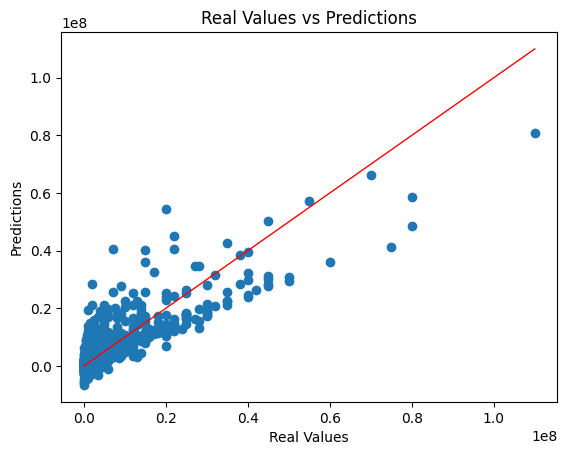

In [ ]:
plt.scatter(Real_Values, predictions)
plt.plot([Real_Values.min(), Real_Values.max()], [Real_Values.min(), Real_Values.max()], color='red', lw=1)
plt.xlabel('Real Values')
plt.ylabel('Predictions')
plt.title('Real Values vs Predictions')
plt.show()

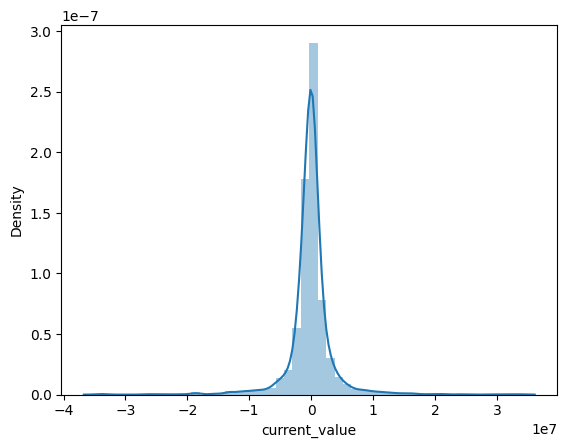

In [ ]:
sns.distplot((y_test-predictions),bins=50); # it's good if we get normal distribution
